# 큐시즘 21기 데이터를 활용해, 22기 연애유무를 맞춰보자

- 흥미를 위해 임의로 만든 데이터입니다.
- 주의 : 실제 데이터 및 결과가 아니기 때문에 흥미 목적으로 봐주세요.
- (실제일수도 ㅎ.ㅎ)

In [12]:
# print("Hello DataScience World")
print("Hello DataScience World")

Hello DataScience World


In [15]:
# a = "본인이름"
# a
a = "상민"
a

'상민'

In [16]:
# print("내 이름은", a)
print("내 이름은", a)

내 이름은 상민


In [17]:
# len(a)
len(a)

2

In [18]:
# range(10)
range(10)

range(0, 10)

In [20]:
# for i in range(10):
#    print(i)
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


## - 실습 목차
### 패키지 불러오기
### 데이터 살펴보기
### EDA(탐색적 데이터 분석)
### 데이터 전처리
### 변수 선택 및 모델링
### 학습 및 검증

# 패키지 불러오기
- import 패키지이름 as 이름요약

In [21]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# 그래프 작성 라이브러리 및 한글 폰트 지정을 위한 코드를 실행합니다. 
# 아래 코드 추가
import matplotlib
from matplotlib import font_manager, rc
import platform



%matplotlib inline

# 이미지 한글 표시 설정
if platform.system() == 'Windows':  # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    # Mac 인 경우 애플고딕
    rc('font', family='AppleGothic')

# 위에 안 될 시 아래 코드로 실행해주세요    
# matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

# 데이터 살펴보기

### pd.read_csv()
- data = ? -> data라는 변수에 오른쪽 ?를 담겠다
- pd.read_csv("경로/파일이름.확장자")
- pandas라는 패키지에서 read_csv라는 함수를 불러온다
- 함수는 보통 ( ) 소가로로 입력값을 받고, 안에 "경로/파일이름.확장자" 순으로 작성
- data/kusitms21_love.csv 라는 것은 data라는 폴더 안에 kusitms21_love.csv라는 파일을 불러오겠다

In [24]:
# pd.read_csv("경로/파일이름.확장자")
data = pd.read_csv("data/kusitms21_love.csv")

### data.head()
- 앞에 데이터 몇 개를 확인하겠다
- ()안에 안 넣으면 5개, (3)을 지정하면 3개 즉 (n)=n개 데이터를 확인하겠다


### data.tail()
- tail도 위와 같은 형식이나 뒤에 데이터를 확인함

In [28]:
# data.head()
data.tail(3)
# data.head(3)

# data.tail()


,ID,학술제파트,직책,성별,나이,연애,스터디,카톡방,지역
77,78,개발,운영진,여,23,0,1,29,NaN
78,79,기획,운영진,여,23,1,2,723,강북
79,80,디자인,운영진,여,24,1,3,78,NaN


- ID: 임의의 번호
- 학술제파트 : 학술제에서 맡은 파트(기획/개발/디자인)
- 직책 : 운영진/회원
- 성별 : 남/여
- 나이 : 현재나이(만x)
- 연애 : 0 -> 큐시즘내에서 연애X , 1 -> 큐시즘내에서 연애O
- 스터디 : 들어가 있는 스터디방 개수
- 카톡방 : 단톡방(수다방)에서 말한 횟수
- 지역 : 현재 사는 지역(인천/경기/강남/강북)

### data.shape : data의 행과 열의 개수를 알려주는 함수
- (행, 열)

In [29]:
# data.shape
data.shape

(80, 9)

### data.info() : data의 정보를 알려주는 함수
- 데이터셋의 column별 정보를 알려주는 함수
- 총 개수, 비어있지 않은 값(non-null), 자료형을 알려줌
- int(정수형숫자), float(실수), object(문자열) 등등

In [30]:
# data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
ID       80 non-null int64
학술제파트    80 non-null object
직책       80 non-null object
성별       80 non-null object
나이       80 non-null int64
연애       80 non-null int64
스터디      80 non-null int64
카톡방      80 non-null int64
지역       7 non-null object
dtypes: int64(5), object(4)
memory usage: 5.8+ KB


### data.decribe()
- data의 통계값을 알려주는 함수
- count : 개수 / mean : 평균 / std : 표준편차 / min : 최소값(이상치 포함)
- 25% : 1분위수 / 50% : 2분위수 / 75% : 3분위수 / max : 최대값(이상치 포함)

In [31]:
# data.describe()
data.describe()

,ID,나이,연애,스터디,카톡방
count,80.0000,80.000000,80.000000,80.000000,80.000000
mean,40.5000,23.212500,0.212500,1.537500,65.625000
std,23.2379,1.429293,0.411658,1.211169,124.844954
min,1.0000,20.000000,0.000000,0.000000,0.000000
25%,20.7500,22.000000,0.000000,1.000000,6.750000
50%,40.5000,23.000000,0.000000,1.000000,17.000000
75%,60.2500,24.000000,0.000000,2.000000,29.500000
max,80.0000,27.000000,1.000000,5.000000,723.000000


# EDA(탐색적 데이터 분석)

### data.set_index()
- index를 column으로 바꾸겠다
- ID를 넣으면 ID를 index로 설정

In [33]:
# data.set_index("ID")
data.set_index("ID")

,학술제파트,직책,성별,나이,연애,스터디,카톡방,지역
ID,,,,,,,,
1,개발,운영진,남,25,0,1,420,강북
2,개발,회원,여,23,0,0,10,강남
3,디자인,회원,여,21,0,2,22,강북
4,개발,회원,남,24,0,1,31,NaN
5,기획,회원,여,23,1,4,17,NaN
...,...,...,...,...,...,...,...,...
76,기획,회원,여,25,0,1,18,NaN
77,디자인,운영진,남,24,0,1,28,NaN
78,개발,운영진,여,23,0,1,29,NaN


### data[ ].value_counts()
- 해당 열의 값 개수를 확인합니다

In [34]:
# data["직책"].value_counts()
data["직책"].value_counts()

회원     56
운영진    24
Name: 직책, dtype: int64

In [35]:
# data["학술제파트"].value_counts()
data["학술제파트"].value_counts()

개발     36
기획     33
디자인    11
Name: 학술제파트, dtype: int64

In [36]:
# data["성별"].value_counts()
data["성별"].value_counts()

여    60
남    20
Name: 성별, dtype: int64

In [37]:
# 연애 열의 값 개수를 확인해주세요
data["연애"].value_counts()

0    63
1    17
Name: 연애, dtype: int64

In [38]:
# data["스터디"].value_counts()
data["스터디"].value_counts()

1    37
2    17
0    12
4     6
3     6
5     2
Name: 스터디, dtype: int64

In [323]:
# data["카톡방"].value_counts()


### data.isnull()
- boolean(true/false)형태로 반환해줌
- data.isnull().sum() -> null값들의 개수를 모두 합하여 나타내줌

In [40]:
# data.isnull().sum()
data.isnull().sum()

ID        0
학술제파트     0
직책        0
성별        0
나이        0
연애        0
스터디       0
카톡방       0
지역       73
dtype: int64

### data.drop()
- drop(삭제할 열 이름, axis=?)
- axis=0일 땐 행 삭제, axis=1일 땐 열 삭제

In [42]:
# data.drop("지역", axis=1)
data.drop("지역", axis=1)

,ID,학술제파트,직책,성별,나이,연애,스터디,카톡방
0,1,개발,운영진,남,25,0,1,420
1,2,개발,회원,여,23,0,0,10
2,3,디자인,회원,여,21,0,2,22
3,4,개발,회원,남,24,0,1,31
4,5,기획,회원,여,23,1,4,17
...,...,...,...,...,...,...,...,...
75,76,기획,회원,여,25,0,1,18
76,77,디자인,운영진,남,24,0,1,28
77,78,개발,운영진,여,23,0,1,29
78,79,기획,운영진,여,23,1,2,723


In [326]:
# data.head()


### data.groupby()

<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

- data.groupby("기준열")["해당열"]
- data.groupby()[].함수()
- 함수가 sum일땐 총 합계, mean()일땐 평균

In [44]:
# data.groupby("직책")["연애"].sum()
data.groupby("직책")["연애"].sum()

직책
운영진    13
회원      4
Name: 연애, dtype: int64

### data.plot()
- 그래프그리기
- .plot() -> 기본값이 꺾은선 / kind="bar"를 하면 막대그래프

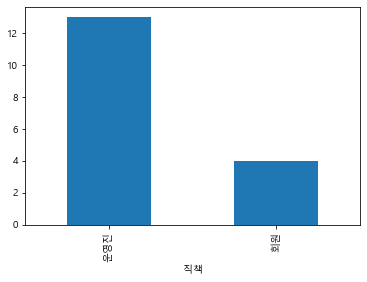

In [45]:
# data.groupby("직책")["연애"].sum().plot(kind="bar")
data.groupby("직책")["연애"].sum().plot(kind="bar")

- rot=0이라는 값을 주면 값을 0도로 회전하여 수평으로 나타내줌. 값을 조정하면서 각도 조정가능

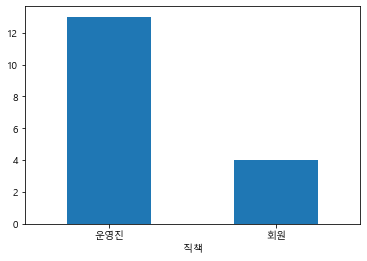

In [46]:
# data.groupby("직책")["연애"].sum().plot(kind="bar", rot=0)
data.groupby("직책")["연애"].sum().plot(kind="bar", rot=0)

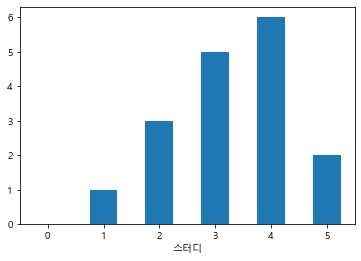

In [47]:
# data.groupby("스터디")["연애"].sum().plot(kind="bar", rot=0)
data.groupby("스터디")["연애"].sum().plot(kind="bar", rot=0)

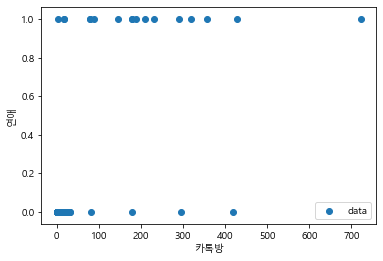

In [331]:
plt.scatter( data['카톡방'], data['연애'], label = "data")

plt.legend(loc = "best")
plt.xlabel('카톡방')
plt.ylabel('연애')
plt.show()

# 변수 선택

- 원래 문자변수도 encoding해야 되지만, 여기서는 숫자변수만 모델에 돌려보겠습니다.
- 가설 : 나이, 스터디, 카톡방이 뭔가 연애에 영향을 많이 줄 것 같다

In [48]:
# x_features = data[ ['나이','스터디','카톡방'] ]
# y_label = data['연애'] 
x_features = data[ ['나이','스터디','카톡방'] ]
y_label = data['연애']

### sklearn 패키지 설치

In [50]:
# import random
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix, accuracy_score
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score



### train_test_split(학습변수, 예측변수, test_size, random_state)
- test_size=0.3이면 train:test = 7:3으로 나누겠다는 뜻
- random_state는 데이터를 random으로 뽑아온다는 뜻으로 숫자는 상관없음, 우리는 22기니까 22으로 통일!

In [52]:
# x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.3, random_state=22)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.3, random_state=22)

### decisionTreeClassifier()
- decision tree 분류 알고리즘을 사용

In [53]:
# dt = DecisionTreeClassifier(random_state = 22)
dt = DecisionTreeClassifier(random_state = 22)

### model.fit()
- 모델 학습

In [54]:
# dt.fit(x_train, y_train)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=22)

### model.predict()
- 모델 예측

In [55]:
# dt.predict(x_test)
dt.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [56]:
# y_pred = dt.predict(x_test)
y_pred = dt.predict(x_test)

### confusion_matrix(예측변수 테스트데이터, 훈련으로 예측한 데이터)
- 1행1열 = 1이라고 예측했는데, 실제로도 1인 경우의 개수
- 2행2열 = 0이라고 예측했는데, 실제로도 0인 경우의 개수
- 1행2열 = 1이라고 예측했으나, 실제값은 0인 경우
- 2행1열 = 0이라고 예측했으나, 실제값은 1인 경우

In [57]:
# confusion_matrix(y_test, y_pred) 
confusion_matrix(y_test, y_pred)

array([[19,  1],
       [ 1,  3]], dtype=int64)

### accuracy_score()
- 정확도 = 맞춘개수/모든개수

In [58]:
# accuracy_score(y_test, y_pred) 
accuracy_score(y_test, y_pred)

0.9166666666666666

### dt.feature_importances_
- feature의 중요도를 나타내주는 함수
- 아래 예시로는 나이, 스터디, 카톡방 순

In [59]:
# dt.feature_importances_
dt.feature_importances_

array([0.        , 0.26303067, 0.73696933])

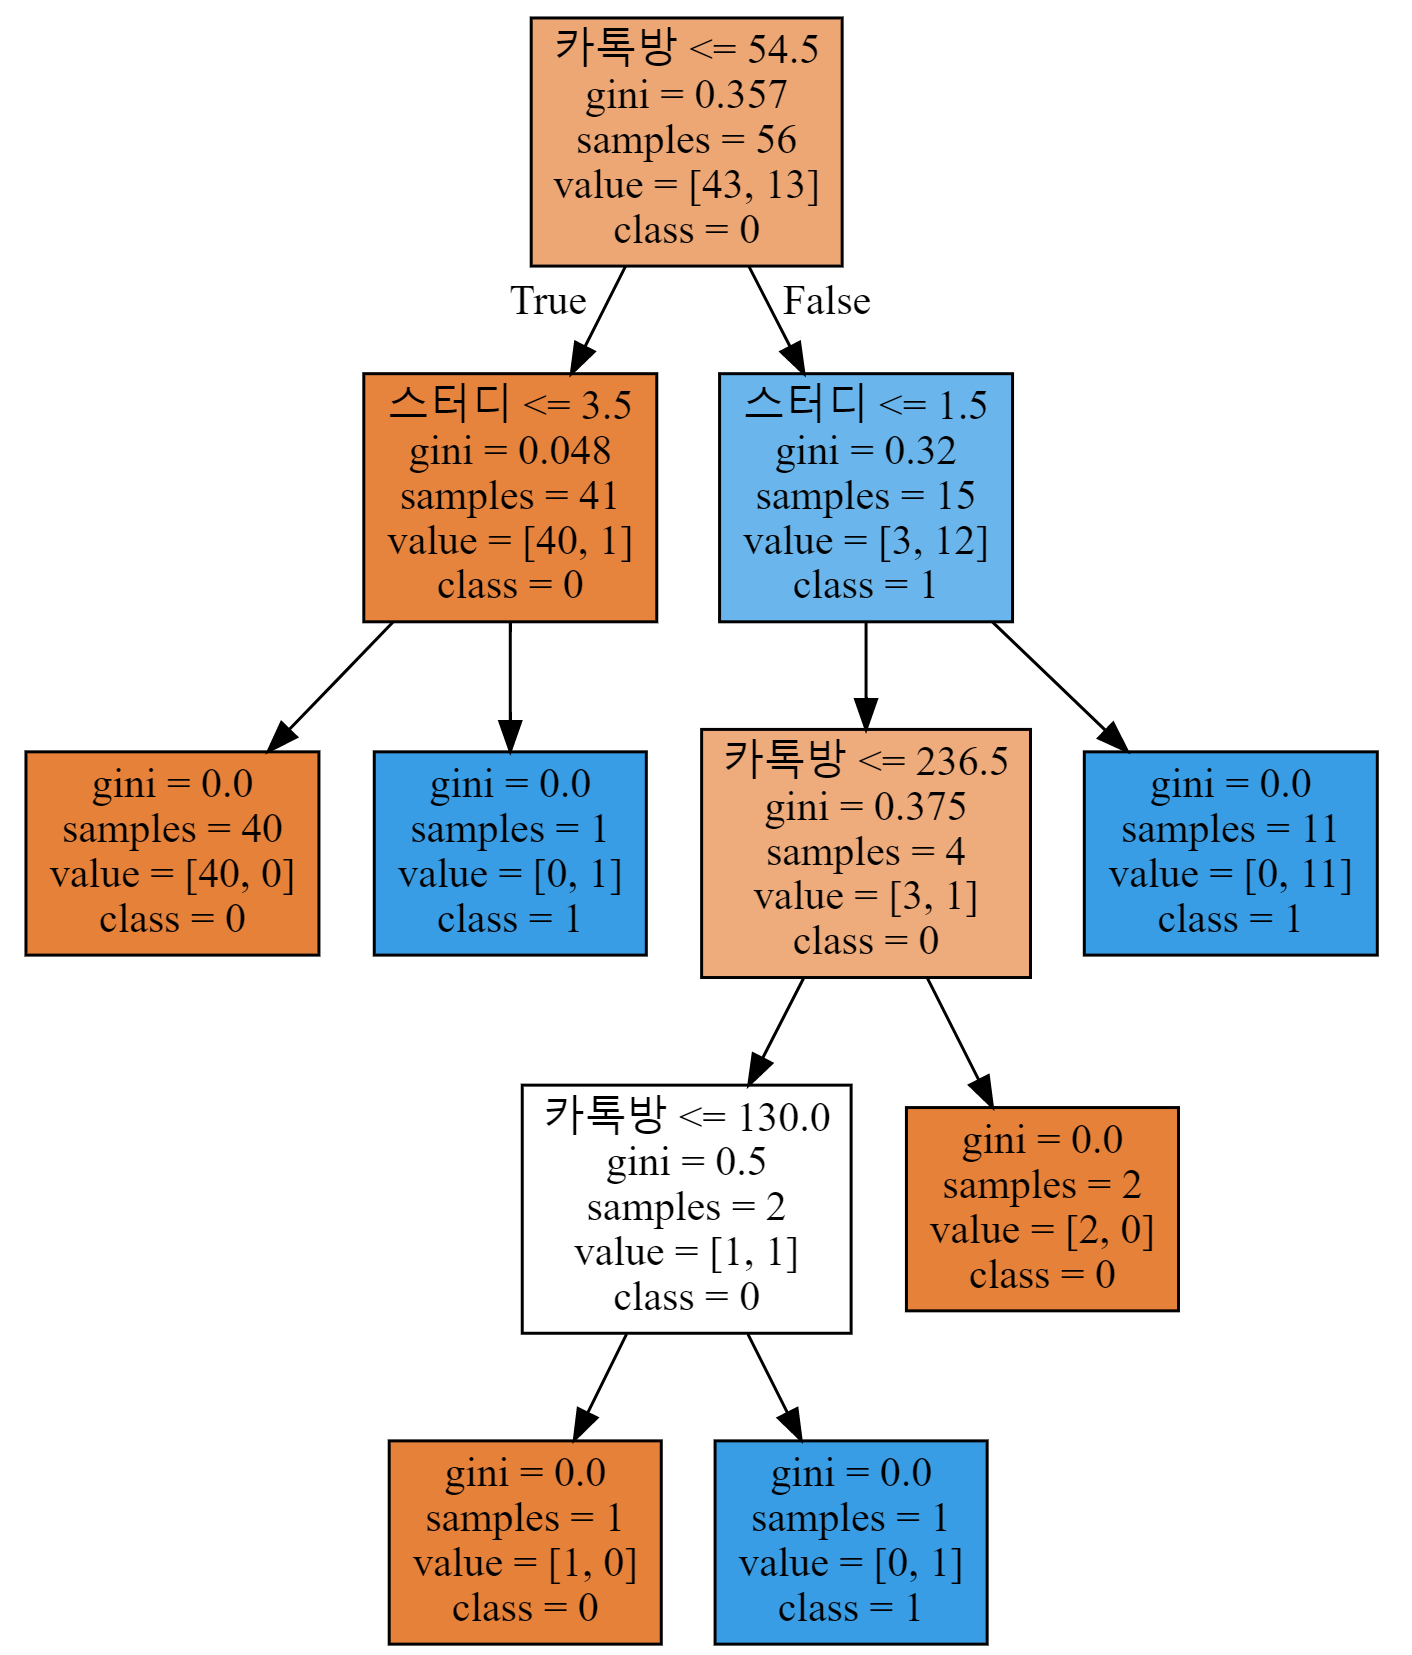

In [1]:
from IPython.display import Image
Image("image.png")

나이 : 0.000
스터디 : 0.263
카톡방 : 0.737


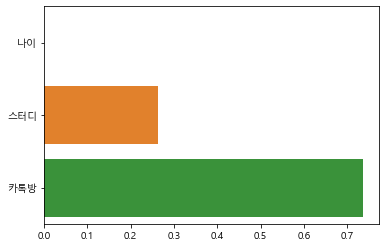

In [345]:
# 이건 위에 예시를 돕기 위한 코드입니다
for name, value in zip(x_features.columns, dt.feature_importances_):
    print("{0} : {1:.3f}".format(name, value))
sns.barplot(x=dt.feature_importances_, y = x_features.columns)

### boxplot(data = 보고싶은 데이터, x=x값, y=y값)
- 평균으로부터 얼마나 퍼져있는지 나타내줌(이상치까지)

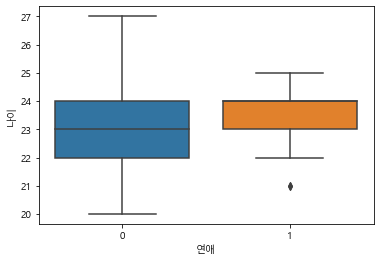

In [60]:
# sns.boxplot(data = data, x = '연애', y='나이')
sns.boxplot(data = data, x = '연애', y='나이')

In [61]:
# 나이에 맞는 연애 유무의 개수를 알아보는 코드
love_0_age = data[data['연애'] == 0]['나이'].values
love_1_age = data[data['연애'] == 1]['나이'].values

In [62]:
# 0과 1의 개수
len(love_0_age), len(love_1_age)

(63, 17)

In [63]:
from scipy import stats

# t검정 코드
# 원래 정규분포 여부, 독립성 여부 등등 부합해야 하지만 생략
two_sample = stats.ttest_ind(love_0_age, love_1_age)

In [64]:
print(two_sample)

Ttest_indResult(statistic=-0.8373810665050481, pvalue=0.4049368622284938)


In [65]:
# t검정 통계량과 pvalue값을 시각적으로 보여주는 코드
print('t검정 통계량 = %.3f, pvalue = %.3f'%(two_sample))


t검정 통계량 = -0.837, pvalue = 0.405


### p-value > 0.05 귀무가설 (연애 x와 연애 o의 나이 평균은 같다)를 채택

In [66]:
print('연애 x :', np.mean(love_0_age))
print('연애 o :', np.mean(love_1_age))

연애 x : 23.142857142857142
연애 o : 23.470588235294116


- 연애에 나이는 중요하지 않다라는 인사이트를 얻음
- -> 스터디 카톡방만 feature로 설정해서 다시 모델링

In [67]:
# model_features = data[['스터디','카톡방']]
# model_label = data['연애']
model_features = data[['스터디','카톡방']]
model_label = data['연애']

In [68]:
dt_clf = DecisionTreeClassifier(random_state = 22) 
dt_clf.fit(model_features, model_label)


DecisionTreeClassifier(random_state=22)

In [72]:
data_22 = pd.read_csv("data/kusitms22_love.csv")
data_22.shape

(20, 7)

In [73]:
# test_features = data_22[['스터디', '카톡방']]
test_features = data_22[['스터디', '카톡방']]

In [74]:
# data_22['연애'] = dt_clf.predict(test_features) 
data_22['연애'] = dt_clf.predict(test_features) 

In [75]:
# data_22
data_22

,ID,학술제파트,직책,성별,나이,스터디,카톡방,연애
0,1,디자인,회원,여,21,0,17,0
1,2,개발,운영진,남,22,1,232,0
2,3,기획,회원,남,24,3,2,0
3,4,개발,회원,여,23,4,15,1
4,5,기획,회원,여,21,1,17,0
5,6,개발,운영진,여,23,1,210,0
6,7,기획,회원,여,24,0,31,0
7,8,개발,회원,여,22,0,12,0
8,9,디자인,회원,여,22,2,15,0
9,10,기획,회원,남,23,5,2,1
